In [186]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [12, 6]

In [271]:
data_path = "../data/origineel"

if not Path(data_path).is_dir():
    raise Warning("Data path does not exist")


In [254]:
# Lijst van .csv-bestanden
data_file_paths = [p for p in Path(data_path).iterdir() if p.suffix==".csv"]

In [256]:
# Lees de drie bestanden van het circuit as pandas DataFrame
cableconfig = pd.read_csv(data_file_paths[0], sep=";")
partialdischarges = pd.read_csv(data_file_paths[1], sep=";")
warning = pd.read_csv(data_file_paths[2], sep=";")

## PD plotjes

In [257]:
partialdischarges

,Date/time (UTC),Location in meters (m),Charge (picocoulomb)
0,2016-08-03 09:00:00,NaN,NaN
1,2016-08-03 09:01:00,NaN,NaN
2,2016-08-03 09:02:00,NaN,NaN
3,2016-08-03 09:04:00,NaN,NaN
4,2016-08-03 09:05:00,NaN,NaN
5,2016-08-03 09:06:00,NaN,NaN
6,2016-08-03 09:07:00,NaN,NaN
7,2016-08-03 09:08:00,NaN,NaN
8,2016-08-03 09:09:00,NaN,NaN
9,2016-08-03 09:10:00,NaN,NaN


In [258]:
# Namen van de kolommen
time_col, location_col, charge_col = partialdischarges.columns

# Check that each row either has location and charge undefinied, or both defined:
for i in np.arange(len(partialdischarges))[np.isnan(partialdischarges[location_col]) != np.isnan(partialdischarges[charge_col])]:
    raise Warning(f"Row {i} has missing values")

# Lijst met bools die aangeeft of er op dat tijdstip een PD was
pd_occured = ~np.isnan(partialdischarges[location_col])

# De drie kolommen; alleen op tijdstippen met PD
locations = partialdischarges[location_col][pd_occured]
charges = partialdischarges[charge_col][pd_occured]
times = partialdischarges[time_col][pd_occured].apply(datetime.datetime.fromisoformat)

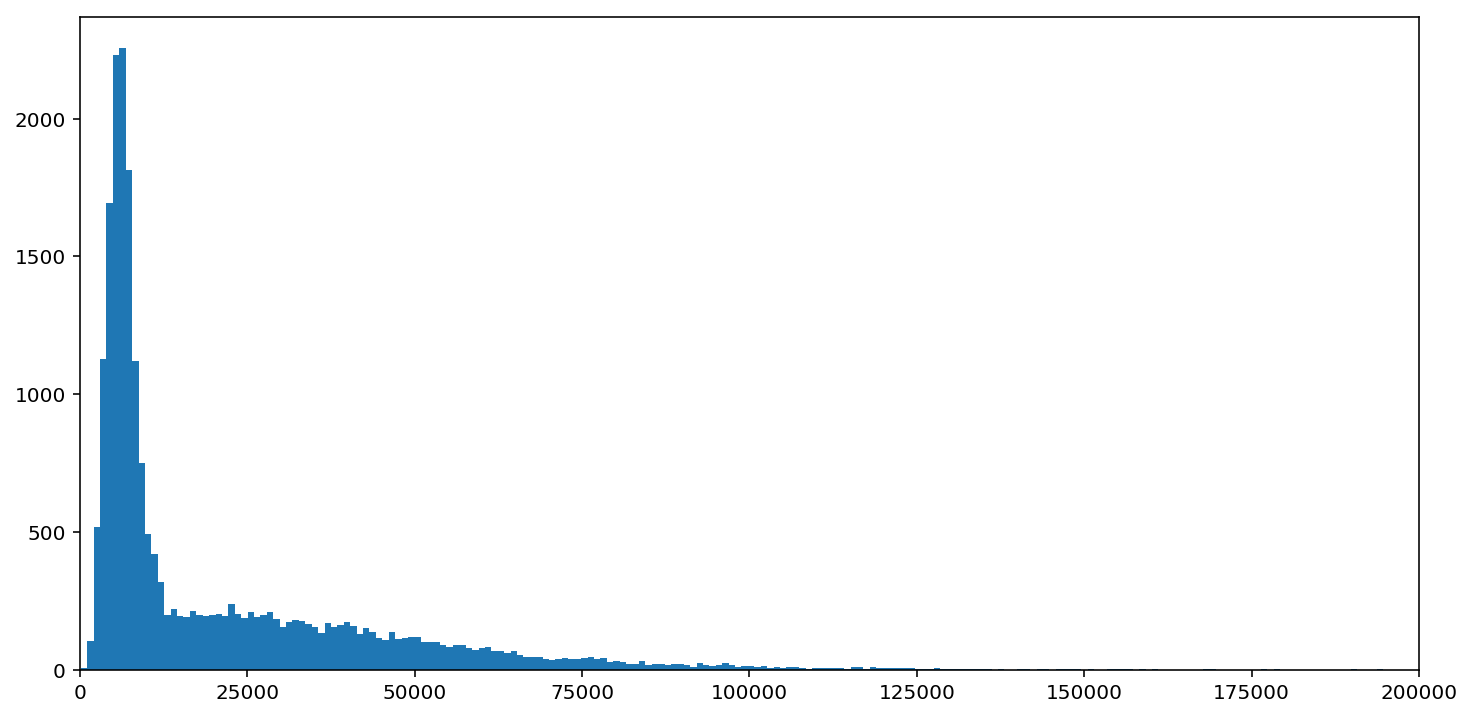

In [267]:
plt.hist(charges,bins=500)
plt.xlim(0,2e5)
plt.show()

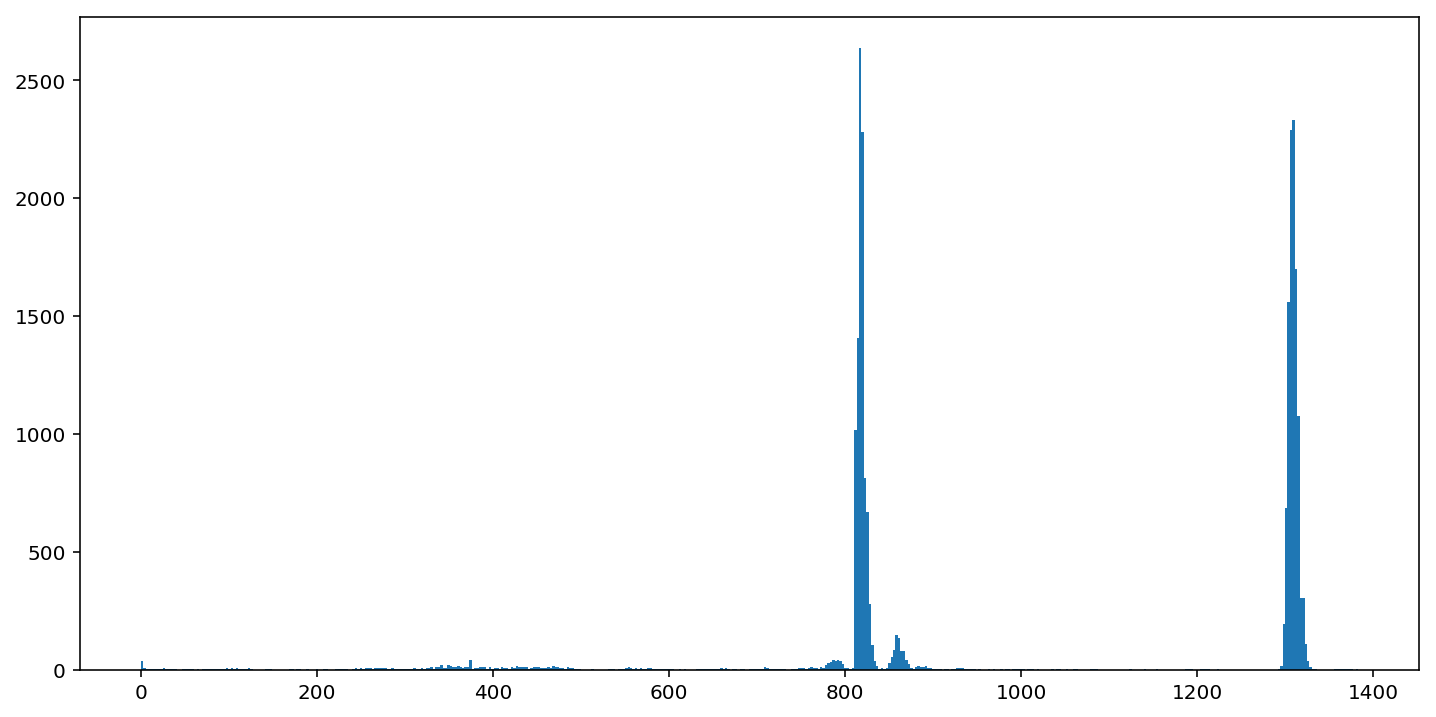

In [260]:
plt.hist(locations,bins=500)
#plt.xlim(0,2e5)
plt.show()

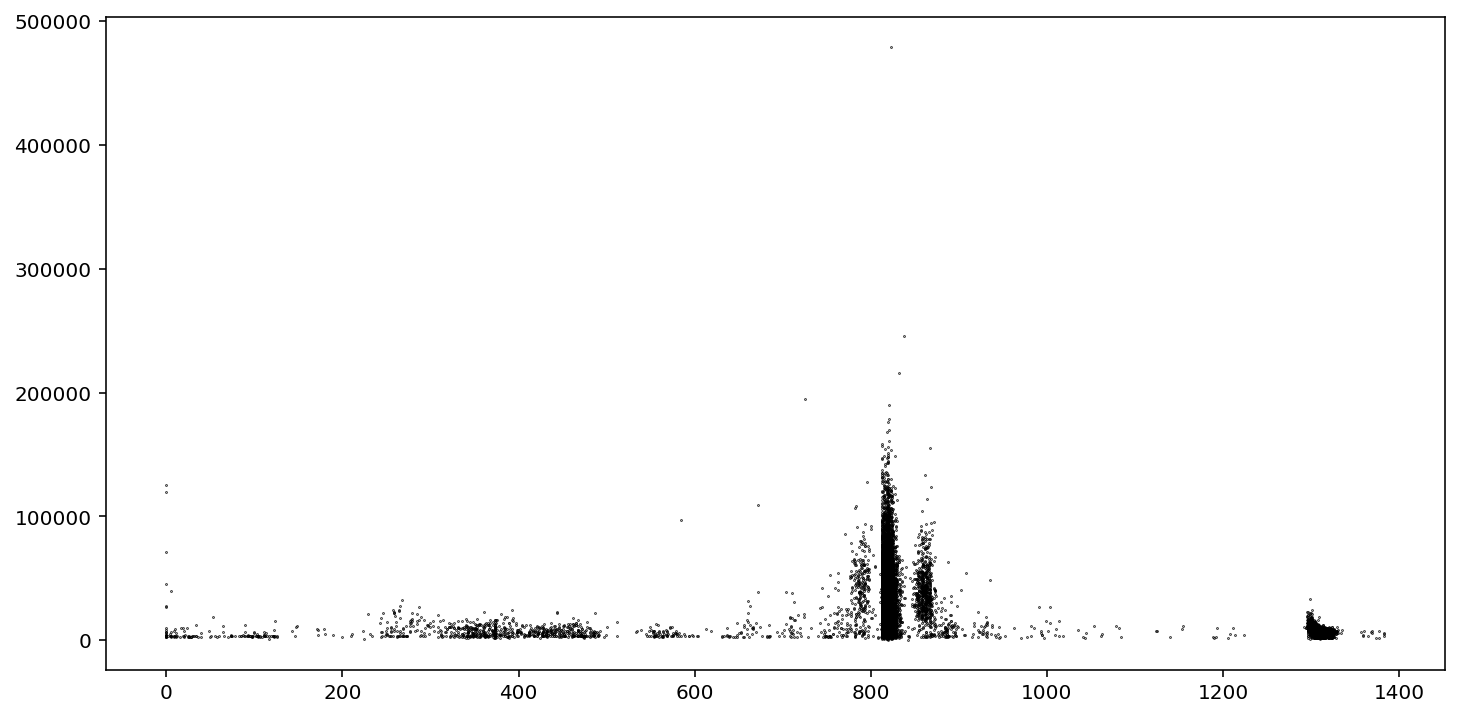

In [263]:
plt.scatter(x=locations, y=charges, s=.1, c='.0')
plt.show()

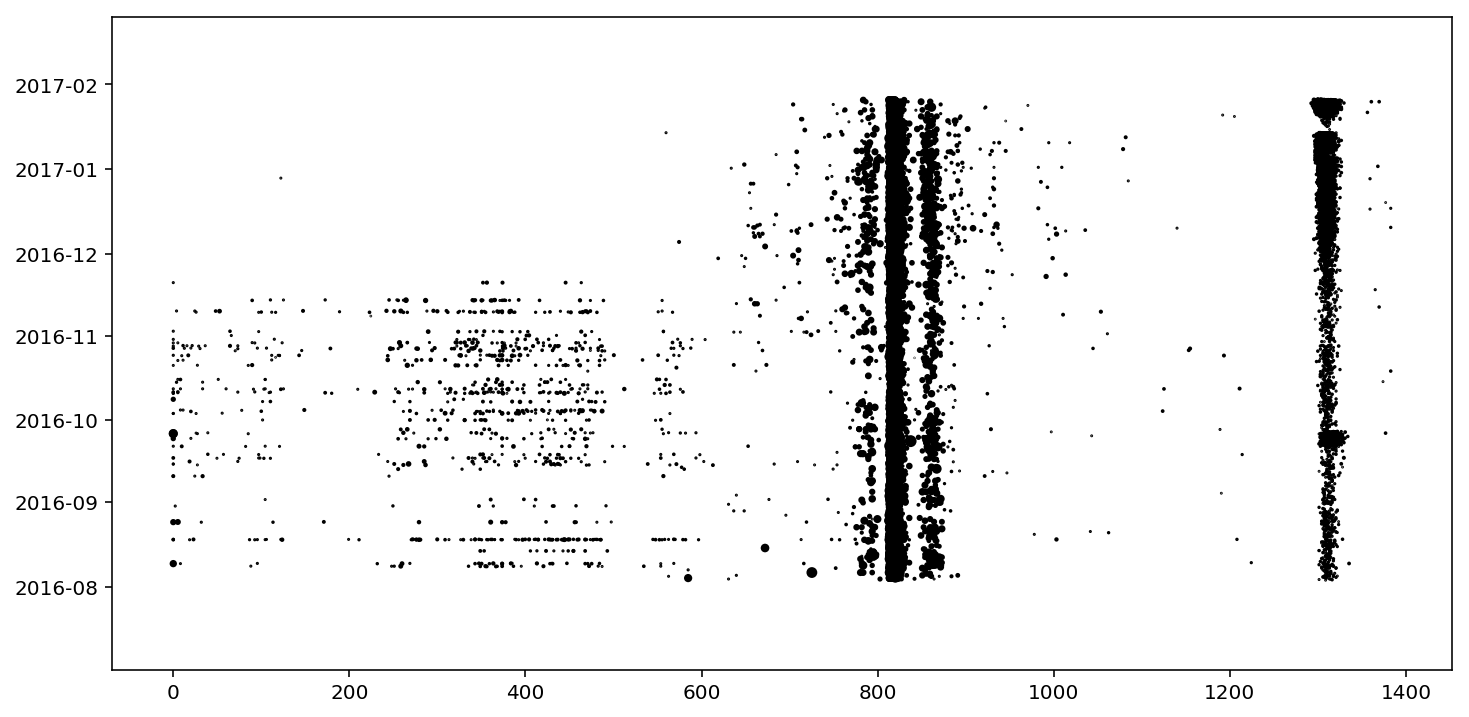

In [264]:
plt.scatter(x=locations, y=times, s=charges/1e4, c='.0')
plt.show()

In [239]:
warning

,Location in meters (m),SCG warning level (1 to 3 or Noise),Start Date/time (UTC),End Date/time (UTC)
0,349,3,2018-02-26 22:40:58,2018-05-27 08:45:43
1,604,2,2018-02-05 00:03:25,2018-02-23 16:08:12
2,604,3,2017-12-30 19:48:43,2018-02-05 00:03:25
